In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data='/content/drive/MyDrive/DL_exam/store/train'

In [ ]:
class_dict={'Slippers':0,'Sandals':1,'Boots':2}
print(class_dict)

{'Slippers': 0, 'Sandals': 1, 'Boots': 2}


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense

In [ ]:
def return_data_labels(path):
  images=[]
  labels=[]
  df=pd.DataFrame(columns=['sub_path','image_link','target_label'])
  for i in os.listdir(path):
    if i != 'chess_CNN.ipynb':
      subfolder_comp_path=os.path.join(path,i)
      class_label=class_dict[i]
      for j in os.listdir(subfolder_comp_path):
        img_comp_path=load_img(os.path.join(subfolder_comp_path,j),target_size=(124,124))
        ## df
        df.loc[len(df.index)]=[subfolder_comp_path,j,class_label]
        img=img_to_array(img_comp_path)/255
        images.append(img)
        labels.append(class_label)
  return df,np.array(images),np.array(labels)

Train dataset

In [ ]:
df,x,y=return_data_labels(data)
print(x.shape)
print(y.shape)

(778, 124, 124, 3)
(778,)


Test dataset

In [ ]:
images=[]

folder_path='/content/drive/MyDrive/DL_exam/store/test'
for j in os.listdir(folder_path):
  img_comp_path=load_img(os.path.join(folder_path,j),target_size=(124,124))
  ## df
  img=img_to_array(img_comp_path)/255
  images.append(img)
images=np.array(images)
print(images.shape)


(89, 124, 124, 3)


In [ ]:
print(df.shape)
df.head(10)


(778, 3)


,sub_path,image_link,target_label
0,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (286).jpg,1
1,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (289).jpg,1
2,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (279).jpg,1
3,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (275).jpg,1
4,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (301).jpg,1
5,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (283).jpg,1
6,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (282).jpg,1
7,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (288).jpg,1
8,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (298).jpg,1
9,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (297).jpg,1


In [ ]:

a=os.path.join('/content/drive/MyDrive/DL_exam/store/train/Slippers','slippers (5).jpg')
print(a)
b=load_img(a,target_size=(124,124))
b
print(img_to_array(b))

/content/drive/MyDrive/DL_exam/store/train/Slippers/slippers (5).jpg
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xone=df.drop('target_label',axis=1)
yone=df['target_label']
print(xone.shape)
print(yone.shape)

(778, 2)
(778,)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(xone,yone,test_size=0.15,random_state=26)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(661, 2)
(117, 2)
(661,)
(117,)


In [ ]:
xtrain.tail()

,sub_path,image_link
723,/content/drive/MyDrive/DL_exam/store/train/Boots,boots (62).jpg
102,/content/drive/MyDrive/DL_exam/store/train/San...,sandals (209).jpg
432,/content/drive/MyDrive/DL_exam/store/train/Sli...,slippers (2).jpg
774,/content/drive/MyDrive/DL_exam/store/train/Boots,boots (34).jpg
318,/content/drive/MyDrive/DL_exam/store/train/Sli...,slippers (76).jpg


In [ ]:
ytrain.head()

581    2
413    0
564    2
322    0
125    1
Name: target_label, dtype: int64

In [ ]:
class_dict_rev={j:i for i,j in class_dict.items()}

Now get the image and ndarray of images

In [ ]:

def return_ndarray(xtrain,ytrain):
  images=[]
  labels=[]
  or_image=[]
  for i,j,k in zip(xtrain['sub_path'],xtrain['image_link'],ytrain):
          img_comp_path=load_img(os.path.join(i,j),target_size=(124,124))
          img=img_to_array(img_comp_path)/255    # normalise the data array
          or_image.append(k)
          images.append(img)
          labels.append(k)
  return np.array(images),np.array(labels)

In [ ]:
arr_image_tr,arr_target_tr=return_ndarray(xtrain,ytrain)
print(arr_image_tr.shape)
print(arr_target_tr)

(661, 124, 124, 3)
[2 0 2 0 1 0 1 2 2 2 1 1 1 0 2 1 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 0 2 1 2 1 2
 1 0 1 1 2 2 0 0 1 0 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 2 1 2 1 0 1 1 1 1 2 0 0
 1 1 0 2 2 1 2 0 1 2 2 1 0 0 2 1 1 1 1 1 0 2 1 1 2 0 2 1 2 1 0 1 1 1 2 1 1
 1 0 1 1 0 2 0 2 1 1 0 2 2 2 2 1 0 1 2 2 0 2 1 0 0 1 1 2 1 2 2 0 0 2 2 1 1
 0 2 1 2 1 1 1 2 2 1 2 0 2 1 2 2 1 1 2 0 1 1 2 1 1 0 0 1 0 1 0 1 1 2 0 0 2
 2 2 1 2 2 0 0 2 1 0 0 2 1 0 2 0 0 2 2 1 2 1 2 2 2 1 2 0 2 2 0 1 1 1 2 1 2
 1 2 2 2 0 2 1 1 2 2 1 0 0 2 2 1 1 1 2 0 2 2 2 2 1 2 2 0 2 1 2 1 0 2 1 2 0
 1 0 1 1 2 1 0 1 1 2 2 2 2 2 1 0 0 2 2 2 0 1 2 0 0 2 1 1 1 0 2 0 2 2 1 2 2
 2 1 0 2 2 1 2 0 0 1 1 2 2 2 1 1 1 2 2 2 2 1 1 1 0 2 1 2 1 1 1 1 1 2 2 0 1
 2 2 2 1 1 1 0 0 1 1 1 2 2 1 1 2 1 0 2 2 1 1 2 0 1 1 2 1 2 2 1 2 1 1 1 0 0
 2 2 2 1 1 2 2 1 2 2 1 0 0 0 0 1 2 0 2 2 1 0 1 2 1 2 1 2 1 2 2 2 1 2 0 0 2
 2 2 2 1 1 1 1 2 1 2 1 1 2 1 1 0 0 2 1 2 0 2 2 2 0 2 1 0 0 0 1 1 0 1 1 1 1
 2 1 0 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 2 0 0 2 2 1 1 1 0 1 2 2 2 0 1 2
 0 0 0

In [ ]:
arr_image_te,arr_target_te=return_ndarray(xtest,ytest)
print(arr_image_te.shape)
print(arr_target_te)

(117, 124, 124, 3)
[0 1 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 2 1 2 1 0 0 2 2 1 1 2 0 1 1 0
 1 2 2 1 2 1 1 2 2 1 0 0 1 2 1 1 1 1 1 0 2 2 1 2 2 2 1 1 1 1 0 2 2 2 1 2 1
 0 2 2 2 2 1 1 1 2 2 1 1 2 1 0 2 2 1 1 0 2 0 0 2 1 1 1 2 2 2 2 0 1 2 2 1 2
 1 2 1 1 2 1]


Some images from training data

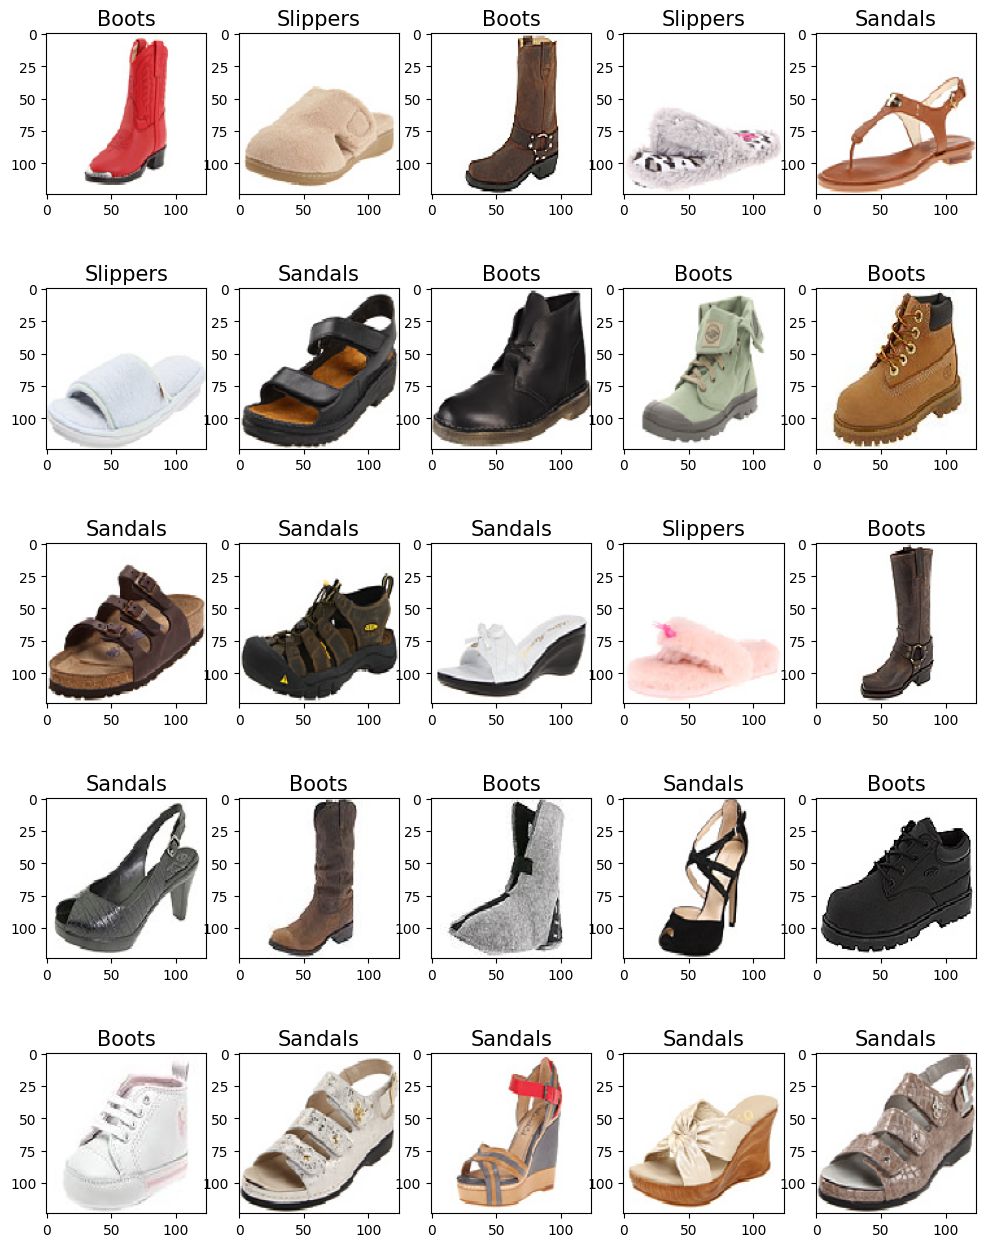

In [ ]:
plt.figure(figsize=(12,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(arr_image_tr[i])
  plt.title(f'{class_dict_rev[arr_target_tr[i]]}',fontsize=15)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(arr_target_tr))
print(Counter(arr_target_te))

Counter({2: 273, 1: 257, 0: 131})
Counter({2: 53, 1: 49, 0: 15})


First model structure

In [ ]:
m1=Sequential()
m1.add(Conv2D(128,(3,3),activation='relu',input_shape=(124,124,3)))
m1.add(MaxPooling2D(pool_size=(3,3)))

m1.add(Conv2D(64,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(3,3)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(3,3)))

m1.add(Flatten())     # change into 1D

# start of ANN
m1.add(Dense(128,activation='relu'))
m1.add(Dense(32,activation='relu'))
m1.add(Dense(3,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
m1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0

In [ ]:
h1=m1.fit(arr_image_tr,arr_target_tr,validation_data=(arr_image_te,arr_target_te),epochs=30)

Epoch 1/30
21/21 [==============================] - 30s 1s/step - loss: 0.9480 - acc: 0.5870 - val_loss: 0.5655 - val_acc: 0.8120
Epoch 2/30
21/21 [==============================] - 29s 1s/step - loss: 0.4542 - acc: 0.8094 - val_loss: 0.5546 - val_acc: 0.7607
Epoch 3/30
21/21 [==============================] - 31s 1s/step - loss: 0.3153 - acc: 0.8669 - val_loss: 0.2772 - val_acc: 0.9060
Epoch 4/30
21/21 [==============================] - 30s 1s/step - loss: 0.2536 - acc: 0.8926 - val_loss: 0.2782 - val_acc: 0.8803
Epoch 5/30
21/21 [==============================] - 29s 1s/step - loss: 0.2361 - acc: 0.9002 - val_loss: 0.3167 - val_acc: 0.8547
Epoch 6/30
21/21 [==============================] - 31s 1s/step - loss: 0.2152 - acc: 0.9092 - val_loss: 0.2666 - val_acc: 0.9060
Epoch 7/30
21/21 [==============================] - 28s 1s/step - loss: 0.1846 - acc: 0.9334 - val_loss: 0.2168 - val_acc: 0.9231
Epoch 8/30
21/21 [==============================] - 29s 1s/step - loss: 0.1620 - acc: 0.94

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail(10)

,loss,acc,val_loss,val_acc,Epochs
20,0.026592,0.987897,0.116811,0.957265,20
21,0.023350,0.995461,0.165110,0.957265,21
22,0.013776,0.995461,0.149867,0.965812,22
23,0.010762,0.996974,0.157406,0.931624,23
24,0.052340,0.983359,0.319999,0.914530,24
25,0.061601,0.978820,0.177895,0.940171,25
26,0.080195,0.965204,0.223964,0.957265,26
27,0.065693,0.972769,0.173054,0.948718,27
28,0.028668,0.992436,0.185096,0.965812,28
29,0.010779,0.996974,0.155887,0.982906,29


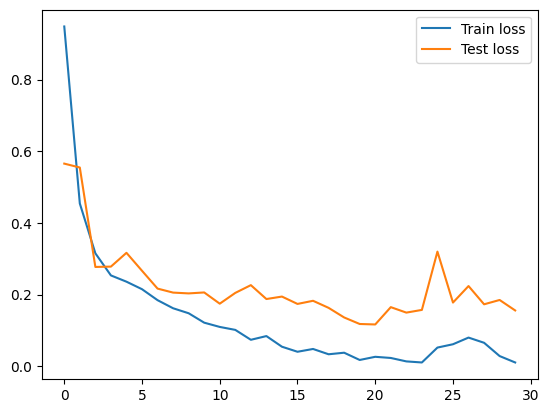

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.legend()
plt.show()

Model 2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
m2=Sequential()
m2.add(Conv2D(128,(3,3),activation='relu',input_shape=(124,124,3)))
m2.add(MaxPooling2D(pool_size=(3,3)))

m2.add(Conv2D(64,(3,3),activation='relu'))
m2.add(MaxPooling2D(pool_size=(3,3)))

m2.add(Conv2D(32,(3,3),activation='relu'))
m2.add(MaxPooling2D(pool_size=(3,3)))

m2.add(Flatten())     # change into 1D

# start of ANN
m2.add(Dense(128,activation='relu'))
m2.add(Dense(32,activation='relu'))
m2.add(Dense(3,activation='softmax'))

m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
m2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 40, 40, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 32)         

In [ ]:
h2=m2.fit(arr_image_tr,arr_target_tr,validation_data=(arr_image_te,arr_target_te),epochs=30,callbacks=[es])

Epoch 1/30
21/21 [==============================] - 29s 1s/step - loss: 0.9277 - acc: 0.5855 - val_loss: 0.5801 - val_acc: 0.7692
Epoch 2/30
21/21 [==============================] - 31s 1s/step - loss: 0.4651 - acc: 0.8124 - val_loss: 0.3351 - val_acc: 0.8889
Epoch 3/30
21/21 [==============================] - 28s 1s/step - loss: 0.3170 - acc: 0.8699 - val_loss: 0.3002 - val_acc: 0.8889
Epoch 4/30
21/21 [==============================] - 29s 1s/step - loss: 0.2909 - acc: 0.8956 - val_loss: 0.3009 - val_acc: 0.8974
Epoch 5/30
21/21 [==============================] - 29s 1s/step - loss: 0.2362 - acc: 0.8956 - val_loss: 0.2293 - val_acc: 0.8974
Epoch 6/30
21/21 [==============================] - 28s 1s/step - loss: 0.1978 - acc: 0.9213 - val_loss: 0.2501 - val_acc: 0.8889
Epoch 7/30
21/21 [==============================] - 27s 1s/step - loss: 0.1797 - acc: 0.9274 - val_loss: 0.1974 - val_acc: 0.9060
Epoch 8/30
21/21 [==============================] - 28s 1s/step - loss: 0.2108 - acc: 0.92

In [ ]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail(10)

,loss,acc,val_loss,val_acc,Epochs
4,0.236154,0.895613,0.229261,0.897436,4
5,0.197780,0.921331,0.250089,0.888889,5
6,0.179699,0.927383,0.197449,0.905983,6
7,0.210843,0.922844,0.241731,0.905983,7
8,0.163092,0.936460,0.194644,0.923077,8
9,0.146744,0.950076,0.230681,0.914530,9
10,0.109532,0.963691,0.162176,0.931624,10
11,0.101509,0.960666,0.166959,0.957265,11
12,0.117135,0.950076,0.184878,0.940171,12
13,0.084288,0.968230,0.177326,0.931624,13


In [ ]:
plt.plot(r2['Epochs'],r2['loss'],label='Train loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Test loss')
plt.legend()
plt.show()

make predictions

In [ ]:
ypred=m2.predict(arr_image_te)

4/4 [==============================] - 1s 280ms/step


In [ ]:
ypred_label=[np.argmax(i) for i in ypred]

In [ ]:
print(confusion_matrix(arr_target_te,ypred_label))

Make predictions based on actual given test data

In [ ]:
ypred=m1.predict(images)

In [ ]:
ypred_label=[np.argmax(i) for i in ypred]

In [ ]:
from sklearn.metrics import*

In [ ]:
print(images.shape)
print(len(ypred_label))

In [ ]:
np.argmax(m1.predict(images[[1]])[0])

In [ ]:
def test_results(idx):
    pred=m1.predict(images[[idx]])
    pred_label=np.argmax(pred[0])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(images[idx],'gray')
    plt.subplot(1,2,2)
    plt.bar(range(3),pred[0])
    plt.title(f"prediction:{class_dict_rev[pred_label]}")
    plt.grid()
    plt.show()

In [ ]:
test_results(19)